In [1]:
import pandas as pd
import seaborn as sn
import re, random, pickle, warnings
import numpy as np
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc,precision_recall_curve,f1_score
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import SimpleRNN,Flatten,LSTM,Dense,Embedding,Dropout
from keras.utils import pad_sequences

### Load Data and Handling Missing Data

In [8]:
df = pd.read_csv("D:\\chrome downloads\\archive\\movie.csv")
df.dropna(subset=['text'], inplace=True)
df

,text,sentiment
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [9]:
df_shuffled = shuffle(df, random_state=42)
df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 32823 to 15795
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       40000 non-null  object
 1   sentiment  40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 937.5+ KB


In [10]:
print(df_shuffled['sentiment'].value_counts())

0    20019
1    19981
Name: sentiment, dtype: int64


### Text Preprocessing

In [11]:
def func_1(text):
    stop_words=set(stopwords.words('english'))
    lemmatizer=WordNetLemmatizer()

    cleaned_string = re.sub(r'[-_.,;:\'"#<>\/$=&@*!)(}{?\d]', '', text)
    cleaned_string = cleaned_string.lower()

    cleaned_string = ' '.join([i for i in cleaned_string.split() if i not in stop_words])

    lemmatized_words = [lemmatizer.lemmatize(word) for word in cleaned_string.split()]
    lemmatized_string = ' '.join(lemmatized_words)

    return lemmatized_string

In [13]:
df_shuffled['text']=df_shuffled['text'].apply(lambda i: func_1(i))
df_shuffled

,text,sentiment
32823,central theme movie seems confusion relationsh...,0
16298,excellent example cowboy noir called unemploye...,1
28505,ending made heart jump throat proceeded leave ...,0
6689,chosen one appreciate quality story character ...,1
26893,really funny film especially second third four...,1
...,...,...
6265,movie one worst movie ever seen life waste tim...,0
11284,movie inspiring anyone tough jam whether finan...,1
38158,east side story documentary musical comedy sta...,1
860,selfadmitted one boot one point doctor assista...,0


### Spliting the Data

In [14]:
warnings.filterwarnings("ignore")

train_ratio = 0.7
df_train, df_test = train_test_split(df_shuffled, test_size=(1 - train_ratio), random_state=50)

print("Info for Train Dataset:")
print(df_train.info())

print("******")

print("Info for Test Dataset:")
print(df_test.info())

Info for Train Dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27999 entries, 113 to 28936
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27999 non-null  object
 1   sentiment  27999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 656.2+ KB
None
******
Info for Test Dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12001 entries, 5807 to 15388
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       12001 non-null  object
 1   sentiment  12001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 281.3+ KB
None


In [15]:
x_train = np.array(df_train['text'].values)
y_train = np.array(df_train['sentiment'].values)
x_test = np.array(df_test['text'].values)
y_test = np.array(df_test['sentiment'].values)
print(x_train[0])
print(y_train)

western done different manner others realism key conchata farrell come wyoming work rip torn ranch presented make interesting slice americana would preferred see big screen rather tape worth look see life back real west cinematography excellent solid torn farrell excel movie
[1 1 0 ... 0 1 1]


### No of features

In [16]:
count_vect=CountVectorizer()
feature_vector=count_vect.fit(df_shuffled.text)

features=feature_vector.get_feature_names_out()

print('Total no of features',len(features))

Total no of features 144957


### Tokenization

In [17]:
tokens=10000
tokenizer=Tokenizer(num_words=tokens,oov_token="<OOV>")

tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

x_test[0]

'understand others reacted rather unpleasantly towards climax yielding twist really hard take seriously think though buildup work rather well music quite menacing spinetingling really provides spooky aura matching unforgiving sound constant ringing telephone driving struggling english actress joan matlinjean marshbonkers shes borrowing pal nice apartment attempting jumpstart career new york citythe city building outside window look realistic david lettermansand unceremoniously welcome noisy telephone ring quite bit followed loud slam wall searching answer regarding one responsible disregard towards sanity joan discovers one rent room former tenant fact strangled without help manager joan decide find causing anguish joan discovers room empty phone particular female voice haunt herbr br episode think tourdeforce jean marsh one woman show shes actress visible follow crisis slowly erodes phone banging room causing much distress grows fear instead leaving joan remains shaken noise breaking 

In [18]:
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [19]:
print(x_test[1])
print(y_test)

[622, 319, 533, 7468, 1, 18, 36, 1590, 3201, 5084, 2137, 192, 644, 791, 33, 32, 975, 100, 569, 481, 37, 231, 619, 114, 147, 714, 1, 192, 1429, 1563, 1590, 745, 114, 2866, 1562, 656, 412, 361, 147, 625, 3513, 2, 2, 5, 304, 1917, 1590, 335, 114, 1056, 842, 1417, 1489, 100, 53, 376, 1721, 1080, 533, 1005, 9368, 2272, 319, 137, 3842, 533, 114, 445, 1590, 33, 842, 985, 705, 100, 53, 6780, 157, 2272, 1, 10, 519, 200, 1762, 4094, 15, 107, 152, 1590, 788, 100, 53, 5514, 1005, 2272, 60, 114, 816, 10, 1, 3, 2470, 15, 107, 2, 2, 16, 389, 71, 5084, 2137, 27, 19, 6, 4991, 3694, 1607, 882, 71, 3, 4663, 29, 1633, 5, 49, 213, 1590, 433, 100, 53, 533, 3842, 213, 371, 4353, 15, 300, 278, 198, 114, 137, 27, 2437, 51, 6, 114, 647, 2073, 924, 2120, 1201, 353, 8309, 213, 168, 100, 53, 2502, 3842, 278, 1590, 98, 1187, 58, 16, 69, 163, 18, 1, 206, 27, 99, 130, 59, 1590, 227, 168, 1, 3520, 5727, 2, 2, 16, 790, 4, 65, 396, 5270, 33, 714, 928, 4401, 3635, 249, 227, 334, 5084, 2137, 300, 670, 1, 516, 5390, 1086, 

###  Vocabulory Size of Data

In [20]:
vocab_size=len(tokenizer.word_index)+1
print("Vocabulory size:",vocab_size)

Vocabulory size: 145848


###  Average sentence size

In [21]:
avg=sum(len(sentence.split()) for sentence in df_train['text'])/len(df_train.text)
print(avg+1)

123.00010714668382


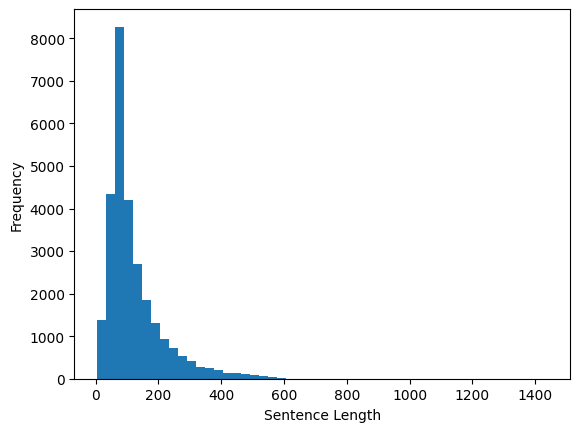

In [22]:
plt.hist([len(sentence.split()) for sentence in df_train['text']], bins=50)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

###  Padding Data

In [23]:
x_train = pad_sequences(x_train, padding='post', maxlen=400)
x_test = pad_sequences(x_test, padding='post', maxlen=400)

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(27999, 400)
(27999,)
(12001, 400)


# Model building using Simple RNN and Training

In [21]:
epochs = 10
batch_size=64

rnn_model = Sequential()

rnn_model.add(Embedding(input_dim=vocab_size,output_dim=300,input_length=400))
rnn_model.add(Dropout(0.5))

rnn_model.add(SimpleRNN(units=64))
rnn_model.add(Dropout(0.5))

rnn_model.add(Dense(units=20,activation='relu'))
rnn_model.add(Dropout(0.5))

rnn_model.add(Flatten())

rnn_model.add(Dense(1,activation='sigmoid'))

rnn_model.summary()

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 300)          43754400  
                                                                 
 dropout (Dropout)           (None, 400, 300)          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                23360     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 20)                1300      
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 flatten (Flatten)           (None, 20)                0

In [22]:
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping

def scheduler(epoch, lr):
    if epoch % 5 == 0 and epoch != 0:
        return lr * 0.8
    else:
        return lr

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_schedule = LearningRateScheduler(scheduler)

In [23]:
history_2 = rnn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(x_test, y_test)
                          ,callbacks=[early_stopping,lr_schedule])

Epoch 1/10
438/438 [==============================] - 251s 562ms/step - loss: 0.6968 - accuracy: 0.4964 - val_loss: 0.6932 - val_accuracy: 0.5035 - lr: 0.0010
Epoch 2/10
438/438 [==============================] - 210s 480ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6931 - val_accuracy: 0.4980 - lr: 0.0010
Epoch 3/10
438/438 [==============================] - 193s 441ms/step - loss: 0.6951 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.4977 - lr: 0.0010
Epoch 4/10
438/438 [==============================] - 189s 433ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.5053 - lr: 0.0010
Epoch 5/10
438/438 [==============================] - 192s 437ms/step - loss: 0.6922 - accuracy: 0.5011 - val_loss: 0.6928 - val_accuracy: 0.5044 - lr: 0.0010
Epoch 6/10
438/438 [==============================] - 186s 425ms/step - loss: 0.6933 - accuracy: 0.4992 - val_loss: 0.6929 - val_accuracy: 0.5049 - lr: 8.0000e-04
Epoch 7/10
438/438 [======================

### Model Accurancy

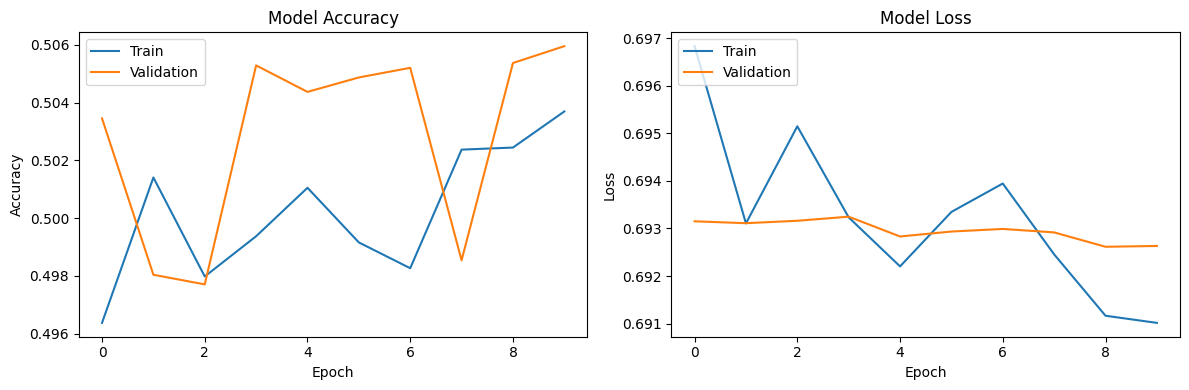

In [24]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [25]:
y_pred = rnn_model.predict(x_test)


376/376 [==============================] - 14s 37ms/step


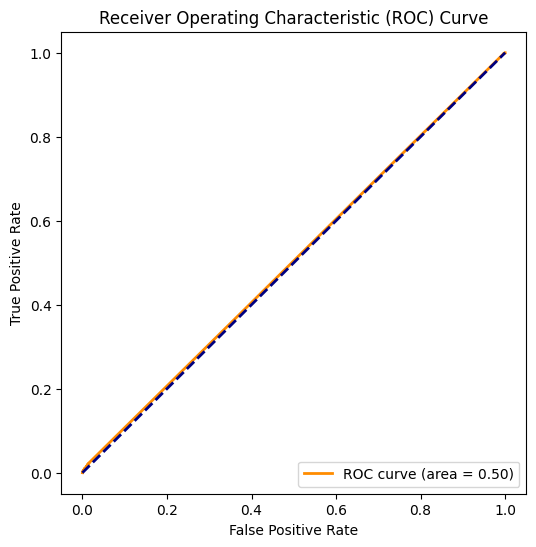

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

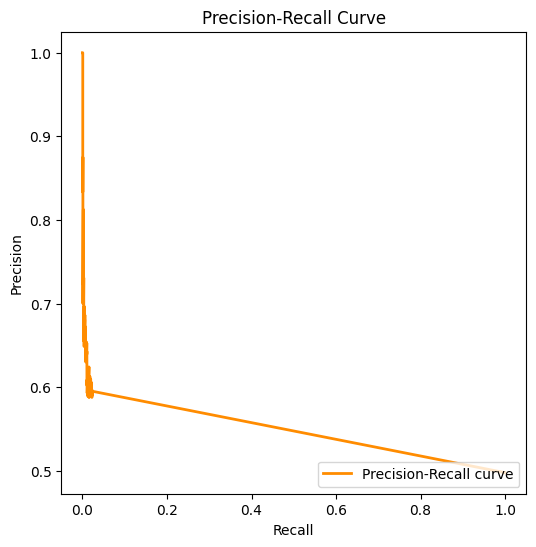

In [27]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

###  Threshold Value

In [28]:
f1_scores = [f1_score(y_test, (y_pred >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print(best_threshold)

0.2791055


### Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      6028
           1       0.50      1.00      0.66      5973

    accuracy                           0.50     12001
   macro avg       0.75      0.50      0.33     12001
weighted avg       0.75      0.50      0.33     12001



Text(8.222222222222223, 0.5, 'Truth')

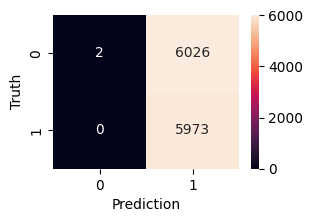

In [29]:
threshold = best_threshold
y_pred_labels = np.where(y_pred >= threshold, 1, 0)

print(classification_report(y_test, y_pred_labels))
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize = (3,2))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

### Model Prediction

In [31]:
def predictions(model,text):
    new_text=func_1(text)
    tokenizer.fit_on_texts(new_text)
    new_text= tokenizer.texts_to_sequences([new_text])
    new_text= pad_sequences(new_text, padding='post', maxlen=400)
    predictions = model.predict(new_text)
    if predictions < best_threshold:
        output='The review is positive'
        value=predictions
    else:
        output='The review is negative'
        value=predictions
    return output,value

In [32]:
text = '''Wow! What an incredible movie! The storyline was engaging, the characters were well-
    developed, and the cinematography was stunning. I couldn't take my eyes off the screen
    from start to finish. The performances were outstanding, and the soundtrack added the
    perfect touch. This is a must-watch for any movie enthusiast!'''

predicted_value,value=predictions(rnn_model,text)

print(predicted_value,value)

1/1 [==============================] - 0s 50ms/step
The review is negative [[0.49878287]]


In [33]:
text = """I was really disappointed with this movie. The plot was confusing and poorly executed,
and the characters felt one-dimensional. The dialogue was lackluster, and I found it hard
to connect with any of the characters. The pacing was off, and there were too many unnecessary
scenes that didn't contribute to the overall story.I had high expectations, but sadly, this movie
didn't live up to them."""

predicted_value,value=predictions(rnn_model,text)

print(predicted_value,value)

1/1 [==============================] - 0s 50ms/step
The review is negative [[0.49878287]]


# Model building using LSTM and Training

In [25]:
lstm_model=Sequential()

lstm_model.add(Embedding(input_dim=vocab_size,output_dim=300,input_length=400))

lstm_model.add(LSTM(units=32,return_sequences=True))
lstm_model.add(Dropout(0.5))

lstm_model.add(LSTM(units=32,return_sequences=False))
lstm_model.add(Dropout(0.5))


lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dropout(0.5))

lstm_model.add(Dense(units=1, activation='sigmoid'))

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 300)          43754400  
                                                                 
 lstm (LSTM)                 (None, 400, 32)           42624     
                                                                 
 dropout (Dropout)           (None, 400, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 20)                660       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0

In [26]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history_1 = lstm_model.fit(x_train,y_train,epochs=15,batch_size=64,verbose=1,validation_data=(x_test, y_test))

Epoch 1/15
438/438 [==============================] - 82s 173ms/step - loss: 0.6937 - accuracy: 0.5026 - val_loss: 0.6932 - val_accuracy: 0.4999
Epoch 2/15
438/438 [==============================] - 44s 100ms/step - loss: 0.6933 - accuracy: 0.5033 - val_loss: 0.6928 - val_accuracy: 0.5024
Epoch 3/15
438/438 [==============================] - 31s 71ms/step - loss: 0.6916 - accuracy: 0.5027 - val_loss: 0.6914 - val_accuracy: 0.5044
Epoch 4/15
438/438 [==============================] - 27s 61ms/step - loss: 0.6878 - accuracy: 0.5077 - val_loss: 0.6943 - val_accuracy: 0.5039
Epoch 5/15
438/438 [==============================] - 26s 58ms/step - loss: 0.6821 - accuracy: 0.5100 - val_loss: 0.6993 - val_accuracy: 0.5025
Epoch 6/15
438/438 [==============================] - 23s 54ms/step - loss: 0.6776 - accuracy: 0.5141 - val_loss: 0.7095 - val_accuracy: 0.5041
Epoch 7/15
438/438 [==============================] - 22s 50ms/step - loss: 0.6765 - accuracy: 0.5131 - val_loss: 0.7089 - val_accurac

### Model Accurancy

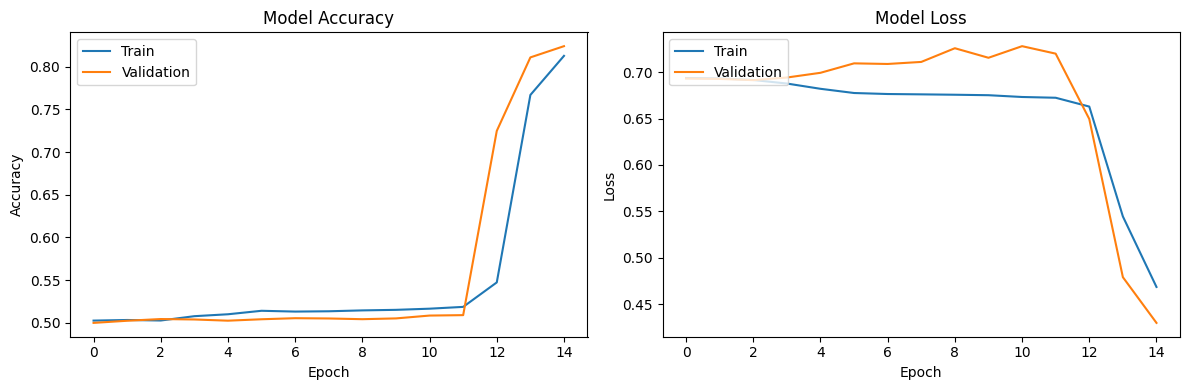

In [28]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [29]:
y_pred = lstm_model.predict(x_test)

376/376 [==============================] - 5s 12ms/step


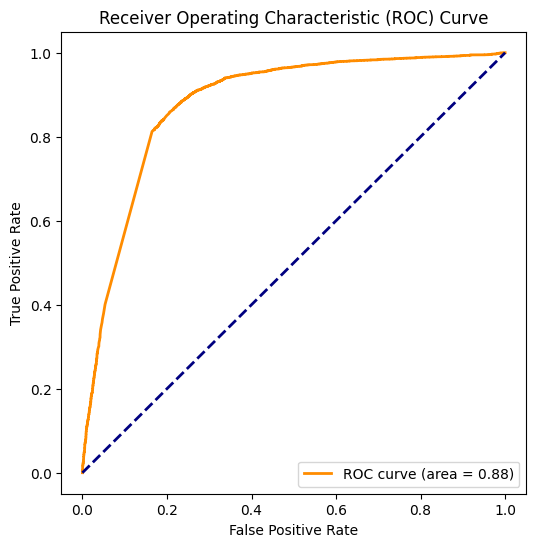

In [30]:


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

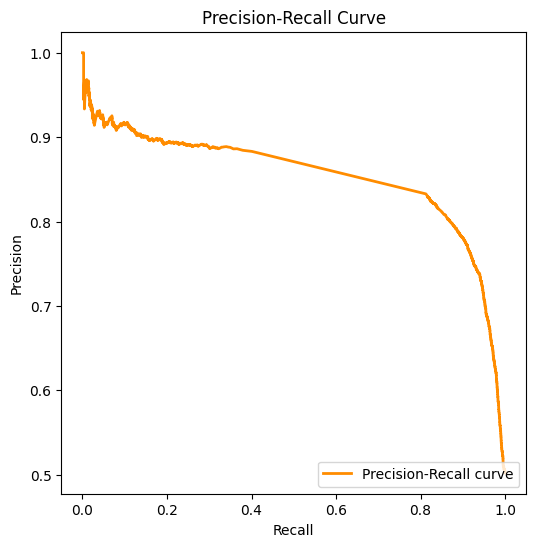

In [31]:

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

### Threshold Value

In [32]:
f1_scores = [f1_score(y_test, (y_pred >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print(best_threshold)

0.38604385


### Confusion Matrix

              precision    recall  f1-score   support

           0       0.88      0.74      0.81      5972
           1       0.78      0.90      0.84      6029

    accuracy                           0.82     12001
   macro avg       0.83      0.82      0.82     12001
weighted avg       0.83      0.82      0.82     12001



Text(8.222222222222223, 0.5, 'Truth')

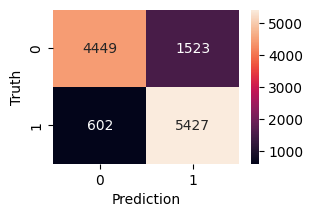

In [33]:
threshold = best_threshold
y_pred_labels = np.where(y_pred >= threshold, 1, 0)

print(classification_report(y_test, y_pred_labels))
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize = (3,2))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

### Model Prediction

In [34]:
def predictions(model,text):
    new_text=func_1(text)
    new_text= tokenizer.texts_to_sequences([new_text])
    new_text= pad_sequences(new_text, padding='post', maxlen=400)
    predictions = model.predict(new_text)
    if predictions > best_threshold:
        output='The review is positive'
    else:
        output='The review is negative'
    return output,predictions

In [35]:
text = '''Wow! What an incredible movie! The storyline was engaging, the characters were well-
    developed, and the cinematography was stunning. I couldn't take my eyes off the screen
    from start to finish. The performances were outstanding, and the soundtrack added the
    perfect touch. This is a must-watch for any movie enthusiast!'''

predicted_value,value=predictions(lstm_model,text)

print(predicted_value,value)


1/1 [==============================] - 0s 26ms/step
The review is positive [[0.8136588]]


In [36]:
text = """I was really disappointed with this movie. The plot was confusing and poorly executed,
and the characters felt one-dimensional. The dialogue was lackluster, and I found it hard
to connect with any of the characters. The pacing was off, and there were too many unnecessary
scenes that didn't contribute to the overall story.I had high expectations, but sadly, this movie
didn't live up to them."""

predicted_value,value=predictions(lstm_model,text)

print(predicted_value,value)

1/1 [==============================] - 0s 26ms/step
The review is negative [[0.2199593]]


In [37]:
text = "The movie was moderate, i will not recommend this movie to anyone"

predicted_value,value=predictions(lstm_model,text)

print(predicted_value,value)

1/1 [==============================] - 0s 25ms/step
The review is positive [[0.8136588]]


In [38]:
text = "The movie was  good, i will recommend this movie to anyone"

predicted_value,value=predictions(lstm_model,text)

print(predicted_value,value)

1/1 [==============================] - 0s 25ms/step
The review is positive [[0.8136588]]


### Save Model

In [ ]:
lstm_model.save('sentiment_rnn_movie_10_25.h5')

In [ ]:
loaded_model=load_model('sentiment_rnn.h5')
loaded_model.summary()